In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib notebook

In [9]:
df = pd.read_csv('UK Gender Pay Gap Data - 2017 to 2018.csv')
new_df = pd.read_csv('UK Gender Pay Gap Data - 2018 to 2019.csv')
sic_df = pd.read_csv('SIC07_CH_condensed_list_en.csv', index_col='SIC Code')

In [27]:
def percentfemale(df):
    total = (df['FemaleLowerQuartile'] + df['FemaleLowerMiddleQuartile'] + df['FemaleUpperMiddleQuartile'] + df['FemaleTopQuartile'])
    percent = total/4
    return percent
    
df['total%female'] = percentfemale(df)


In [11]:
df['SicCodes'] = df['SicCodes'].str.extract(r'(\d+)')


In [15]:
df.loc[df['SicCodes'].isnull(), 'SicCodes'] = 0

In [13]:
df['SicCodes'] = df['SicCodes'].astype('int')

In [14]:
df = df.join(sic_df, on='SicCodes', how='left')

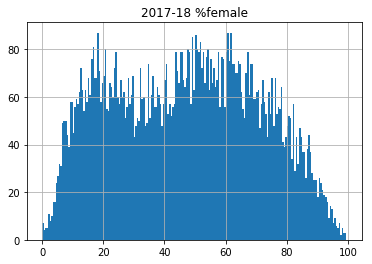

In [33]:
bins = np.arange(0, 100, 0.5)
df['total%female'].hist(bins=bins, density=False)
plt.title('2017-18 %female')
plt.show()

In [28]:
new_df['total%female'] = percentfemale(new_df)

Text(0.5, 1.0, '2018-19 % female')

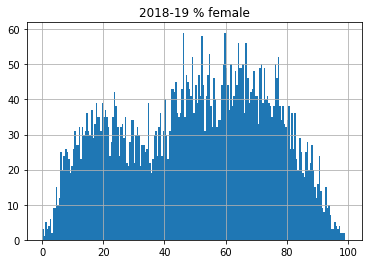

In [34]:
new_df['total%female'].hist(bins=bins, density=False)
plt.title('2018-19 % female')

In [50]:
df.columns

Index(['EmployerName', 'Address', 'CompanyNumber', 'SicCodes',
       'DiffMeanHourlyPercent', 'DiffMedianHourlyPercent',
       'DiffMeanBonusPercent', 'DiffMedianBonusPercent', 'MaleBonusPercent',
       'FemaleBonusPercent', 'MaleLowerQuartile', 'FemaleLowerQuartile',
       'MaleLowerMiddleQuartile', 'FemaleLowerMiddleQuartile',
       'MaleUpperMiddleQuartile', 'FemaleUpperMiddleQuartile',
       'MaleTopQuartile', 'FemaleTopQuartile', 'CompanyLinkToGPGInfo',
       'ResponsiblePerson', 'EmployerSize', 'CurrentName',
       'SubmittedAfterTheDeadline', 'DueDate', 'DateSubmitted', 'total%female',
       'Description'],
      dtype='object')

In [69]:
new_df = new_df.set_index(['CompanyNumber'])

In [72]:
df = df.join(new_df, on=['CompanyNumber'], how='inner', lsuffix=2018, rsuffix=2019)

In [73]:
df.columns

Index(['EmployerName2018', 'Address2018', 'CompanyNumber', 'SicCodes2018',
       'DiffMeanHourlyPercent2018', 'DiffMedianHourlyPercent2018',
       'DiffMeanBonusPercent2018', 'DiffMedianBonusPercent2018',
       'MaleBonusPercent2018', 'FemaleBonusPercent2018',
       'MaleLowerQuartile2018', 'FemaleLowerQuartile2018',
       'MaleLowerMiddleQuartile2018', 'FemaleLowerMiddleQuartile2018',
       'MaleUpperMiddleQuartile2018', 'FemaleUpperMiddleQuartile2018',
       'MaleTopQuartile2018', 'FemaleTopQuartile2018',
       'CompanyLinkToGPGInfo2018', 'ResponsiblePerson2018', 'EmployerSize2018',
       'CurrentName2018', 'SubmittedAfterTheDeadline2018', 'DueDate2018',
       'DateSubmitted2018', 'total%female2018', 'Description',
       'EmployerName2019', 'Address2019', 'SicCodes2019',
       'DiffMeanHourlyPercent2019', 'DiffMedianHourlyPercent2019',
       'DiffMeanBonusPercent2019', 'DiffMedianBonusPercent2019',
       'MaleBonusPercent2019', 'FemaleBonusPercent2019',
       'MaleLowe

In [77]:
df['MeanChange'] = df['DiffMeanHourlyPercent2019'] - df['DiffMeanHourlyPercent2018']

In [85]:
df['MedianChange'] = df['DiffMedianHourlyPercent2019'] - df['DiffMedianHourlyPercent2018']

-0.7622734118941317


<IPython.core.display.Javascript object>


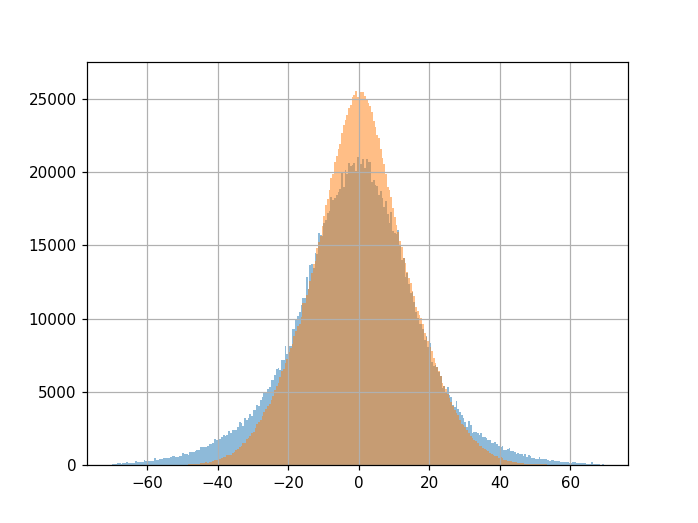

In [90]:
print(df['MedianChange'].mean())

bins = np.arange(-70,70,0.5)
df['MedianChange'].hist(bins=bins, alpha=0.5)

In [91]:
print(df['MeanChange'].mean())

bins = np.arange(-70,70,0.5)
df['MeanChange'].hist(bins=bins, alpha=0.5)

0.47834924821165536


In [1]:
df[['DiffMeanHourlyPercent', 'DiffMedianHourlyPercent']].loc[df['EmployerName'].str.contains('University')].agg(['mean', 'sem'])


NameError: name 'df' is not defined